<a href="https://colab.research.google.com/github/AbhiSrvstv/Stock-Price-prediction-using-LSTM-/blob/main/19th_Aug__Model_deployment_yes_bank_stock_price_prediction_using_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Loading Dataset:
df = pd.read_csv('/content/drive/MyDrive/Yes bank stock prediction/data_YesBank_StockPrices.csv')
df = df.sort_index()
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [5]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [6]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

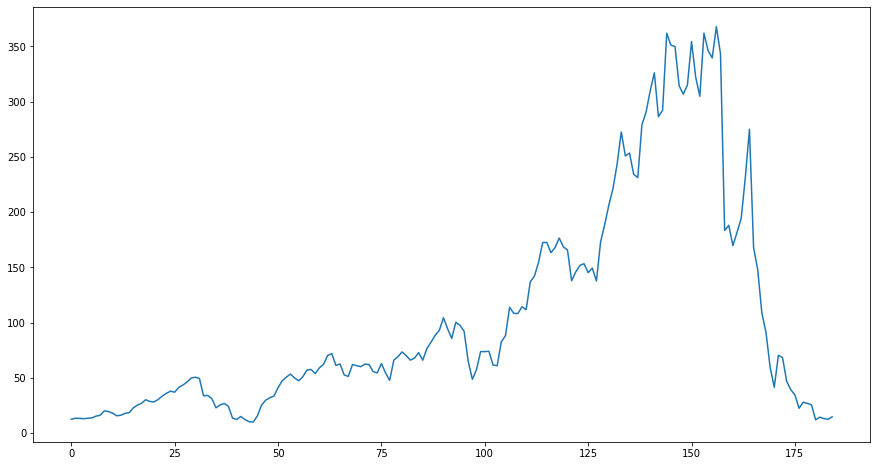

In [7]:
plt.figure(figsize=(15,8))
plt.plot(df['Close'])
plt.show()

In [8]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [9]:
window_size = 1

# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)

In [10]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [11]:
# Use MinMaxScaler to scale the data between 0 and 1. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
X_train[:5]

array([[0.00833449],
       [0.00716766],
       [0.00966801],
       [0.00889012],
       [0.00930685]])

In [12]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.00833449]]

 [[0.00716766]]

 [[0.00966801]]

 [[0.00889012]]

 [[0.00930685]]] 

X_test sample values:
[[[0.35782748]]

 [[0.45011807]]

 [[0.49951382]]

 [[0.54563134]]

 [[0.58885956]]]


##Model 1

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [14]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
model = Sequential()

number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")


In [16]:
model.summary()# Summarize the model
# YOUR CODE HERE!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 30)             3840      
                                                                 
 dropout (Dropout)           (None, 1, 30)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 30)             7320      
                                                                 
 dropout_1 (Dropout)         (None, 1, 30)             0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [17]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
127/127 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 2/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0192
Epoch 3/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 4/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 5/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 6/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 7/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 8/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 9/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 10/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0020


In [18]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 8ms/step - loss: 0.0105


0.010467286221683025

In [19]:
# Make some predictions
predicted = model.predict(X_test)

In [20]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [21]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stocks.head()

,Real,Predicted
0,172.02,131.889053
1,189.80,164.302139
2,206.40,182.042648
3,221.96,198.745544
4,244.00,214.453262


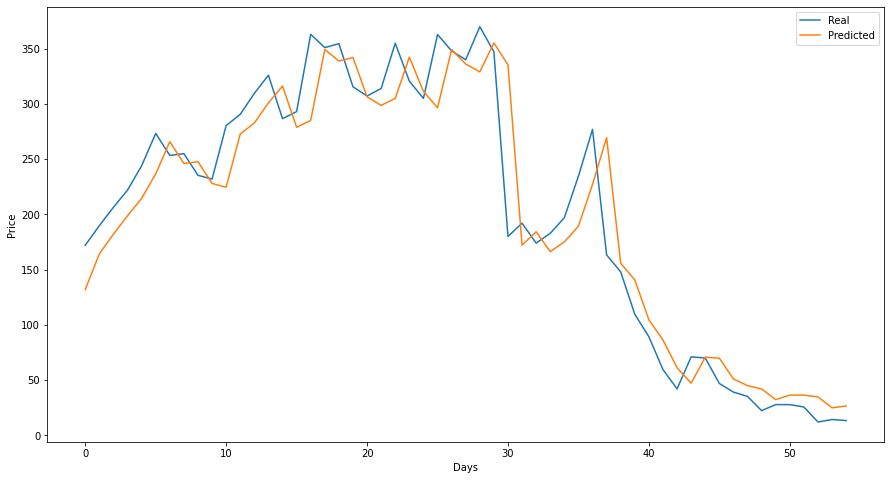

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(stocks['Real'] , label = 'Real')
plt.plot(stocks['Predicted'], label ='Predicted')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.show()

In [23]:
r= stocks['Real'][0]
r

172.02

In [24]:
p = stocks['Predicted'][0]
p

131.88905

In [25]:
accuracy = (p/r)*100
accuracy

76.67076697170478

In [26]:
#save model
import pickle 
pickle.dump(model, open('lstm.pkl', 'wb'))